In [1]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
from skimage.transform import resize

In [2]:
test = imageio.get_reader('./data/UCF101/v_ApplyEyeMakeup_g01_c02.avi')

/home/tao/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


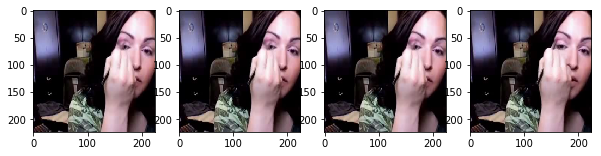

In [3]:
l = test.get_length()
fig, axs = plt.subplots(1, 4, figsize=(10, 8))
for i in range(4):
    img = resize(test.get_data(i), (224, 224), preserve_range=True).astype('uint8')
    axs[i].imshow(img)

In [4]:
print(l)

123


In [5]:
from util import datasets

In [6]:
v_dataset = datasets.UCFDataset('./data/UCF101/')

/home/tao/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


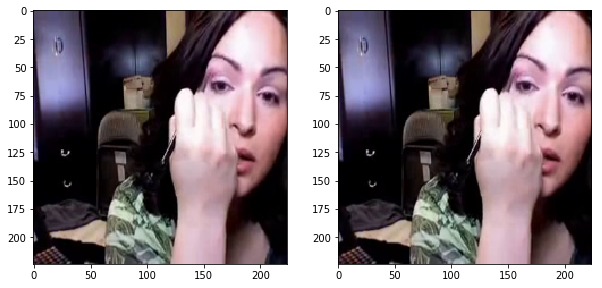

In [9]:
img_1, img_2 = v_dataset[0]
fig, axs = plt.subplots(1, 2, figsize=(10, 8))
axs[0].imshow(img_1)
axs[1].imshow(img_2)